In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv(r'../Datasets/final_data.csv')

In [3]:
df.head()

,pH,N,P,K,OC,Particles,Water_holding_content,Soil_type,crop_type
0,7.03,118.72,25.00,185.82,0.78,0.001686,1.40,clay,carrot
1,2.57,131.09,24.62,181.71,0.90,0.000381,1.31,clay,carrot
2,3.39,104.32,18.37,202.39,0.76,0.000226,1.35,clay,carrot
3,2.73,111.21,21.09,202.71,0.68,0.001399,1.22,clay,carrot
4,1.52,90.90,23.76,195.39,0.74,0.001587,1.21,clay,carrot


In [4]:
df['crop_type'].unique()

array(['carrot', 'coconut', 'cotton', 'groundnut', 'melon', 'millet',
       'potatoes', 'rice', 'vegetable', 'wheat'], dtype=object)

In [5]:
df['Soil_type'].unique()

array(['clay', 'Sandy', 'loamy'], dtype=object)

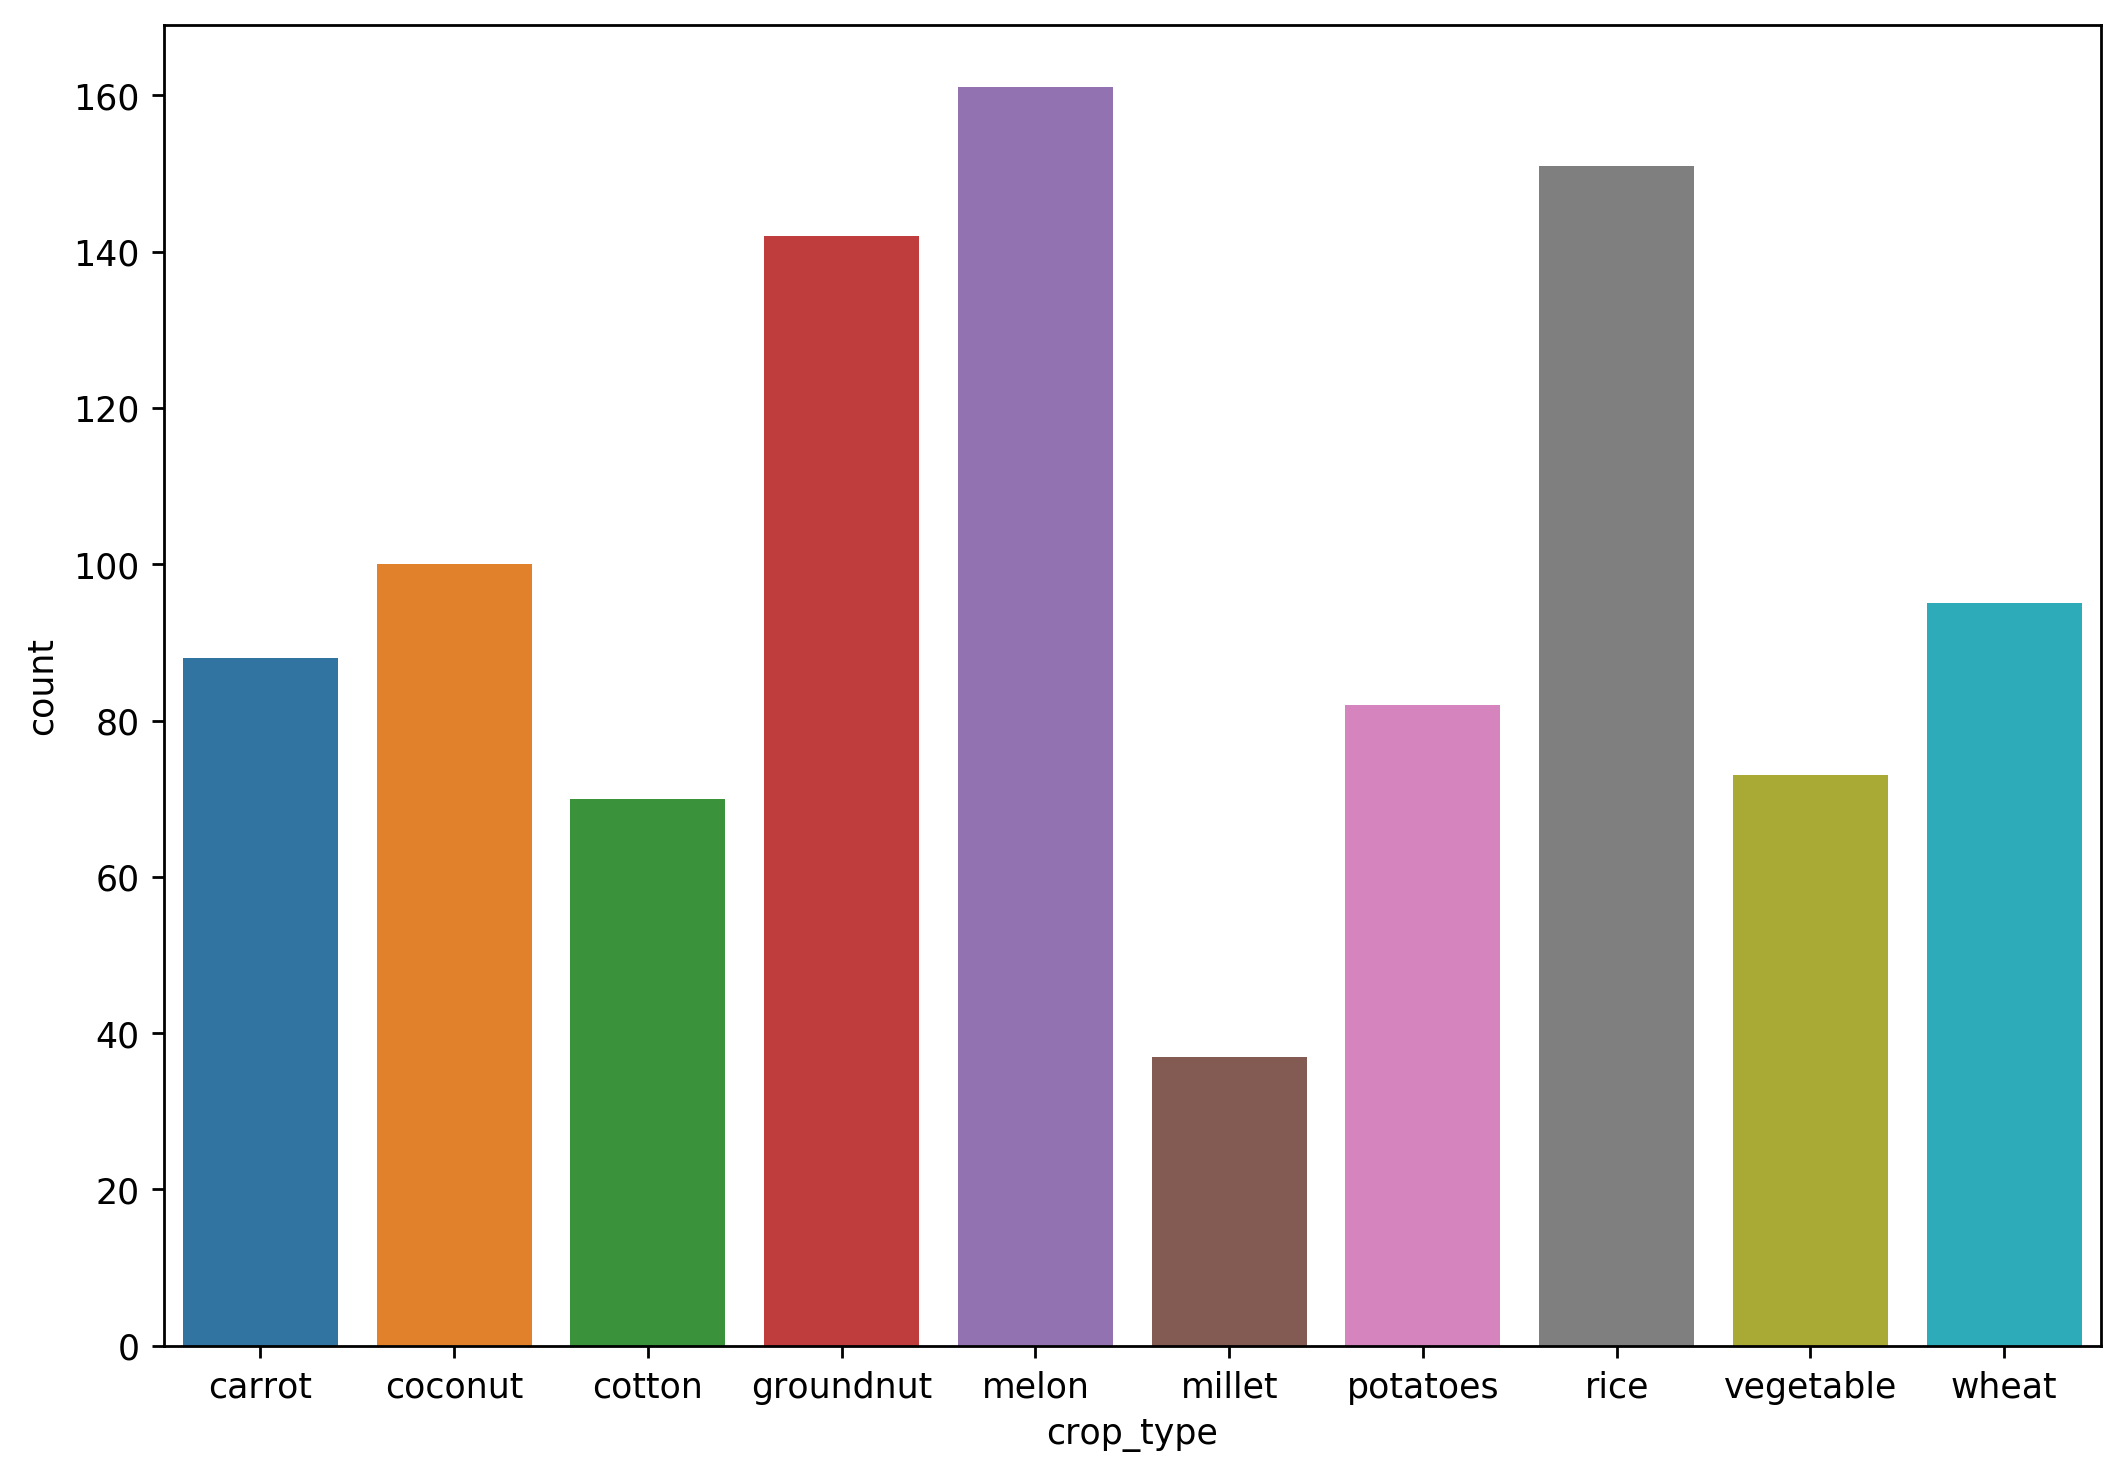

In [6]:
plt.figure(figsize=[10,7],dpi = 250)
sns.countplot(df['crop_type'])

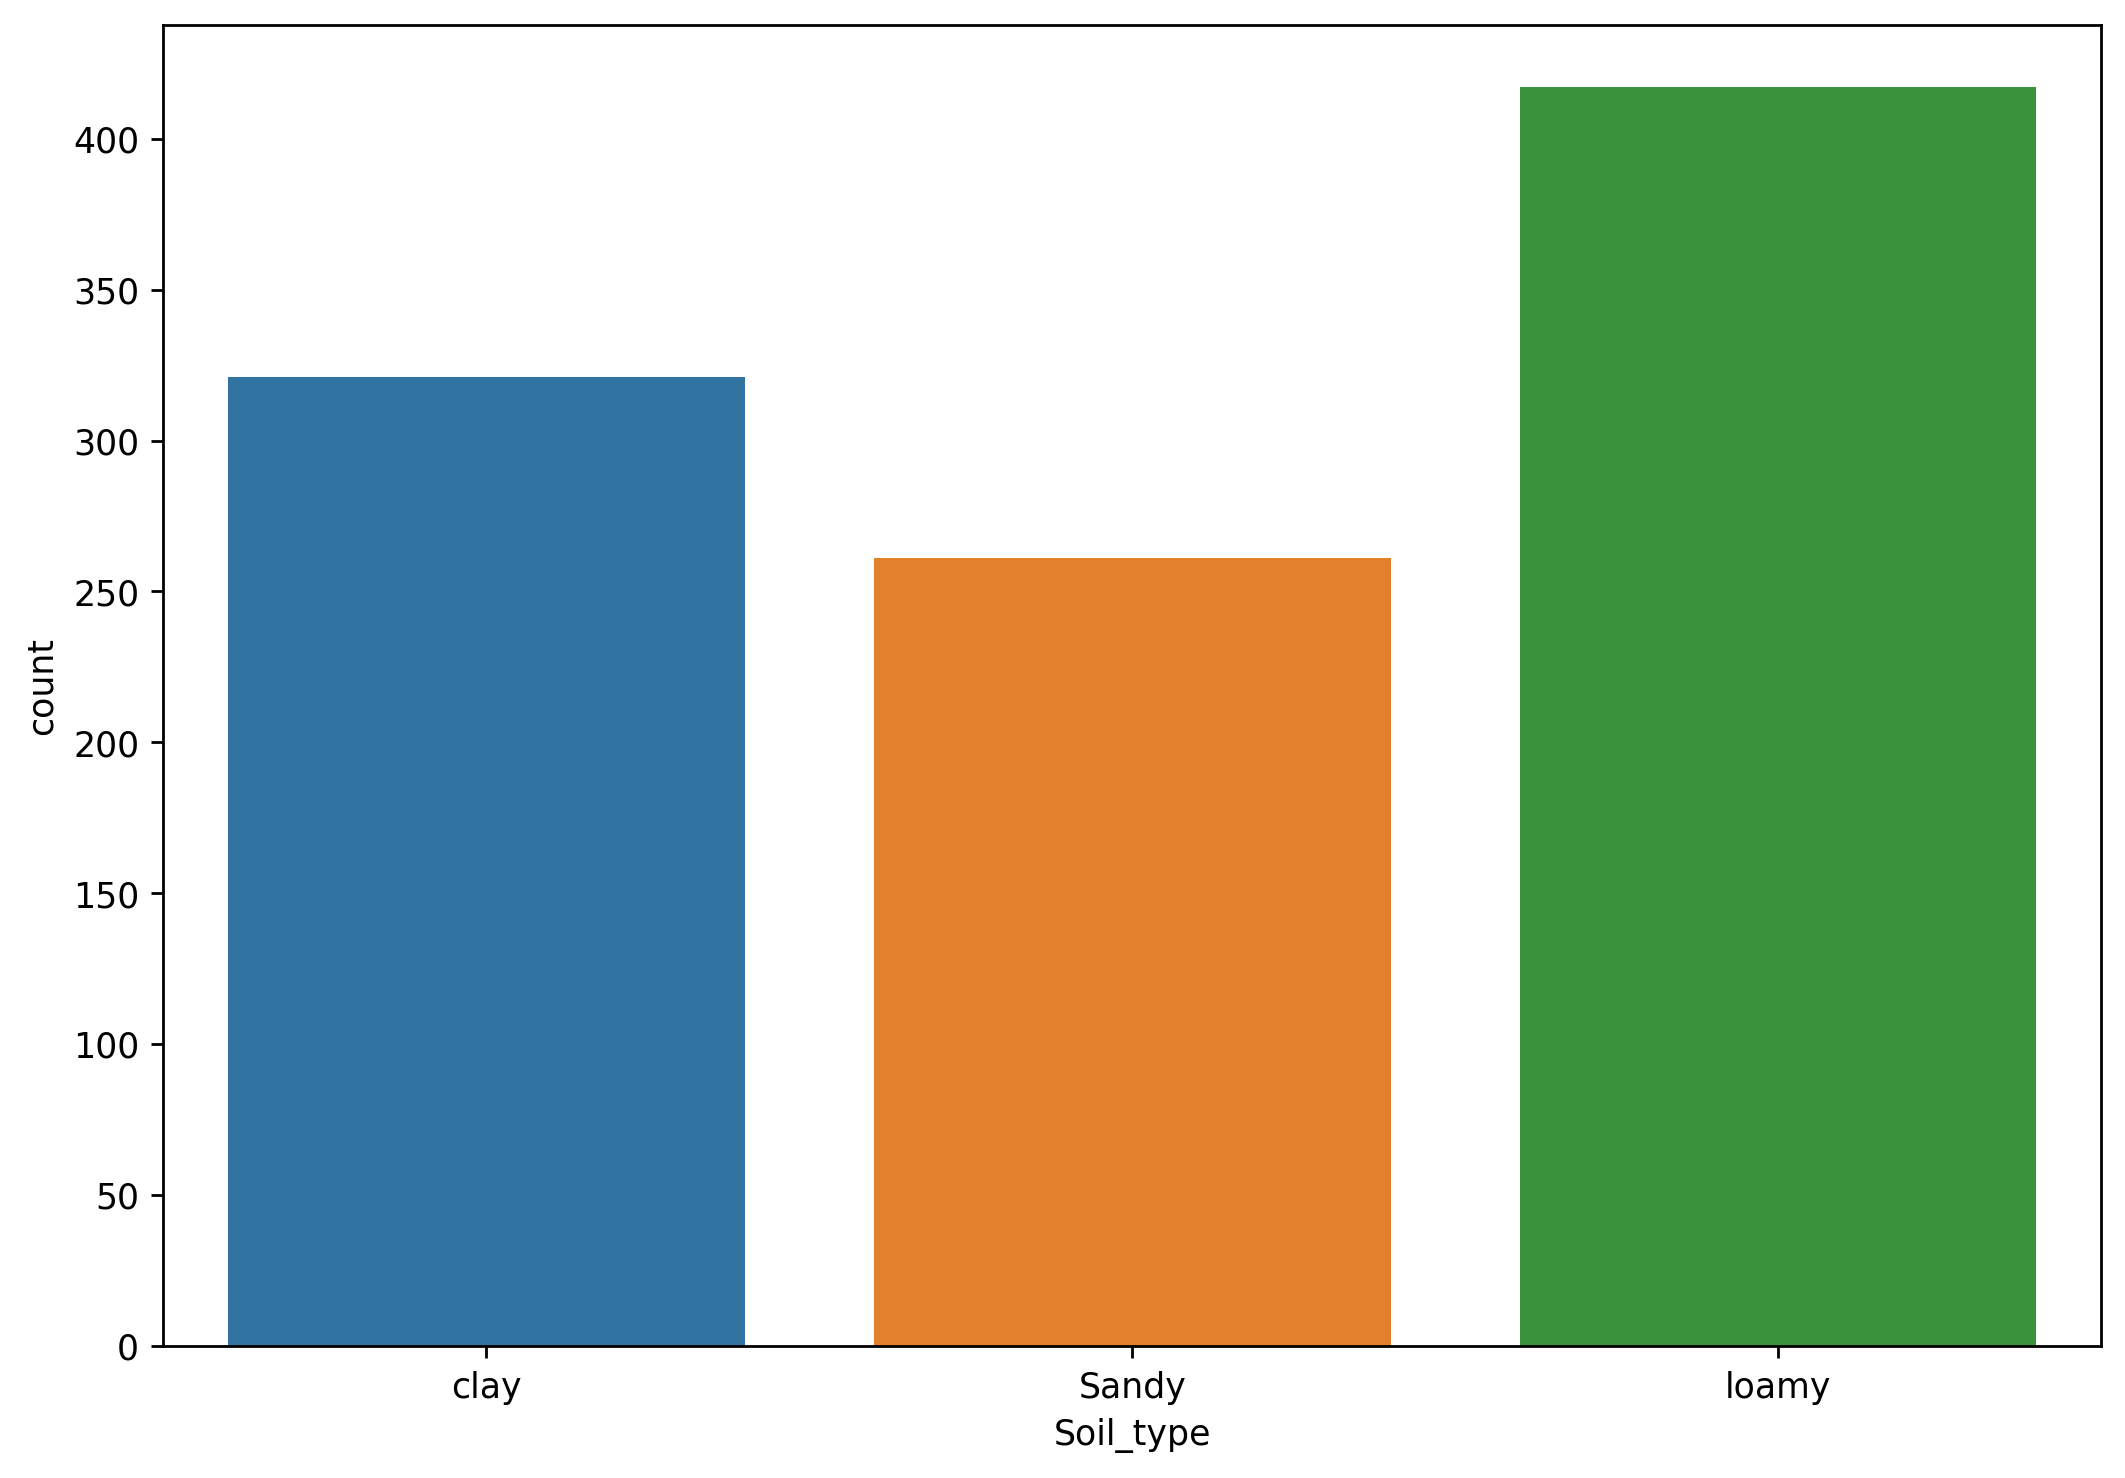

In [7]:
plt.figure(figsize=[10,7],dpi = 250)
sns.countplot(df['Soil_type'])

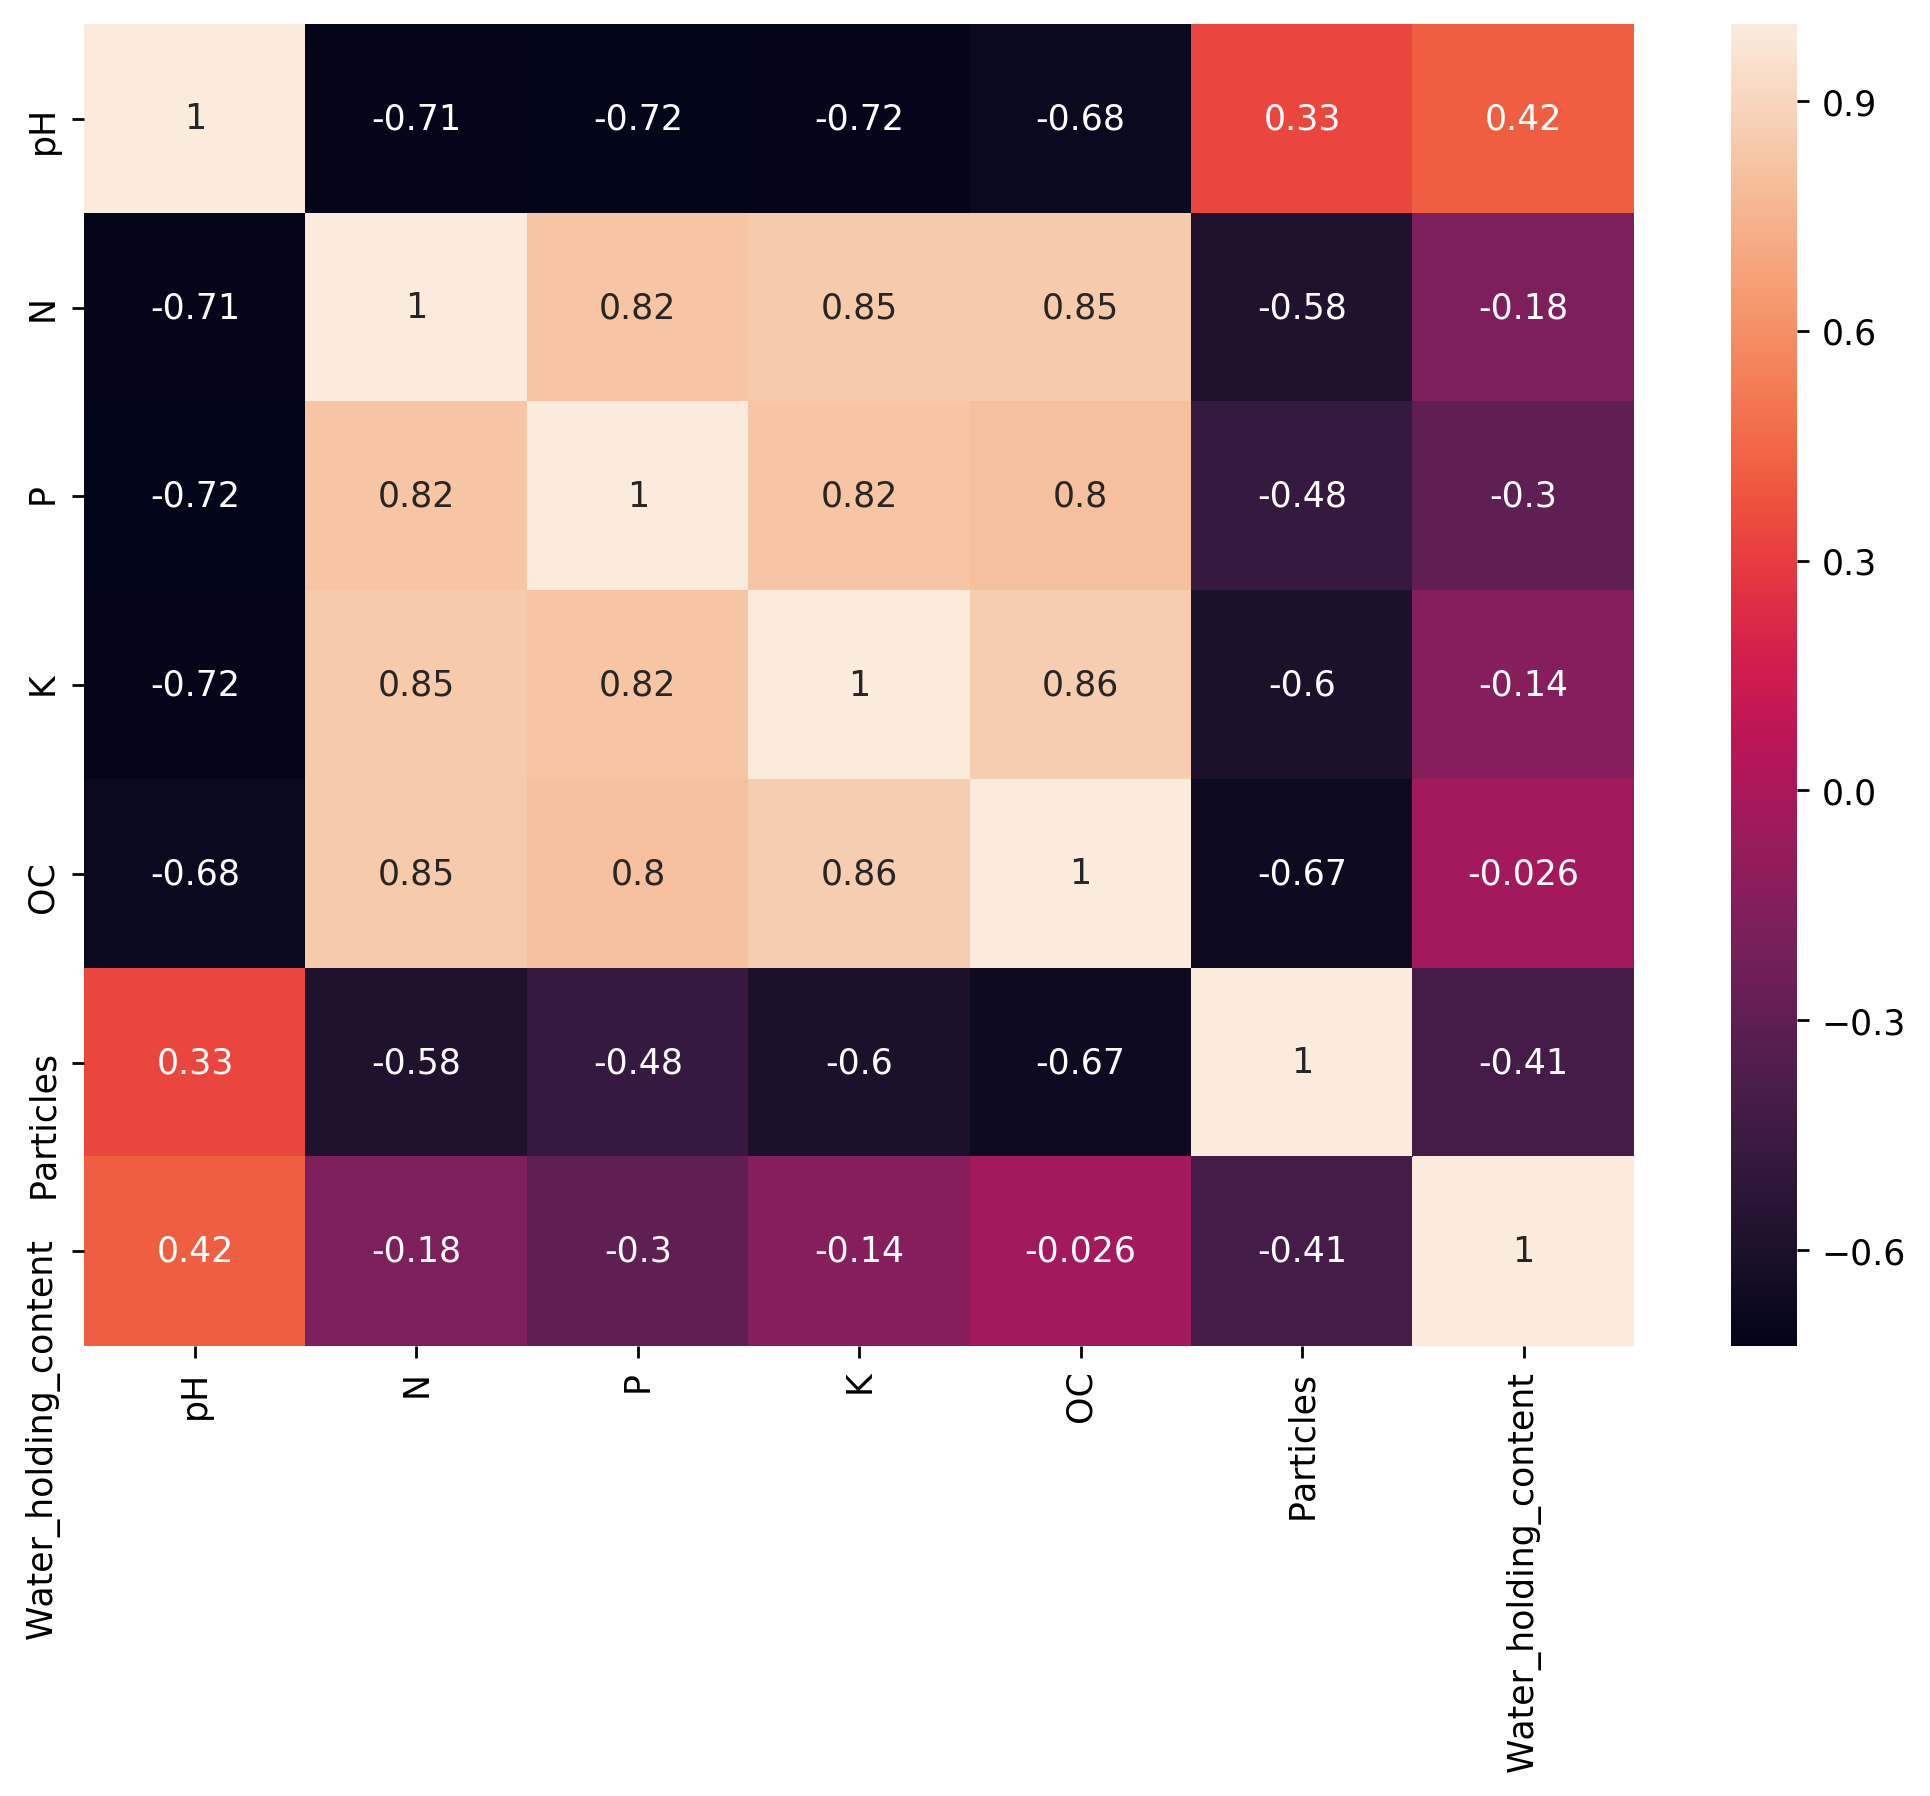

In [8]:
plt.figure(figsize=[10,7],dpi = 250)
sns.heatmap(df.corr(),annot = True)

In [9]:
df.dtypes

pH                       float64
N                        float64
P                        float64
K                        float64
OC                       float64
Particles                float64
Water_holding_content    float64
Soil_type                 object
crop_type                 object
dtype: object

In [51]:
df['Soil_type'] = df['Soil_type'].astype(str)

In [52]:
df['crop_type'] = df['crop_type'].astype(str)

In [13]:
df.describe()

,pH,N,P,K,OC,Particles,Water_holding_content
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,6.498879,69.971431,10.946186,146.753734,0.503173,0.269286,1.722392
std,2.178742,28.300420,7.517791,35.535056,0.266441,0.511614,0.462599
min,0.030000,25.060000,0.610000,100.040000,0.010000,0.000017,1.200000
25%,5.755000,48.895000,4.375000,109.640000,0.290000,0.001569,1.320000
50%,7.630000,65.510000,9.270000,144.330000,0.510000,0.023609,1.430000
75%,7.820000,88.405000,17.760000,178.750000,0.730000,0.115000,2.210000
max,8.000000,134.860000,25.000000,209.810000,0.950000,1.990000,2.500000


In [14]:
df.columns

Index(['pH', 'N', 'P', 'K', 'OC', 'Particles', 'Water_holding_content',
       'Soil_type', 'crop_type'],
      dtype='object')

In [53]:
df = df[['pH', 'N', 'P', 'K','Soil_type', 'crop_type']]

In [25]:
df.head()

,pH,N,P,K,Soil_type,crop_type
0,7.03,118.72,25.00,185.82,clay,carrot
1,2.57,131.09,24.62,181.71,clay,carrot
2,3.39,104.32,18.37,202.39,clay,carrot
3,2.73,111.21,21.09,202.71,clay,carrot
4,1.52,90.90,23.76,195.39,clay,carrot


In [55]:
df.to_csv("ForModel.csv")

In [66]:
df = pd.read_csv('ForModel.csv',index_col=0)

In [67]:
df.head()

,pH,N,P,K,Soil_type,crop_type
0,7.03,118.72,25.00,185.82,clay,carrot
1,2.57,131.09,24.62,181.71,clay,carrot
2,3.39,104.32,18.37,202.39,clay,carrot
3,2.73,111.21,21.09,202.71,clay,carrot
4,1.52,90.90,23.76,195.39,clay,carrot


In [68]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()


In [69]:
df["Soil_type"] = lb_make.fit_transform(df["Soil_type"])

In [70]:
df["crop_type"] = lb_make.fit_transform(df["crop_type"])

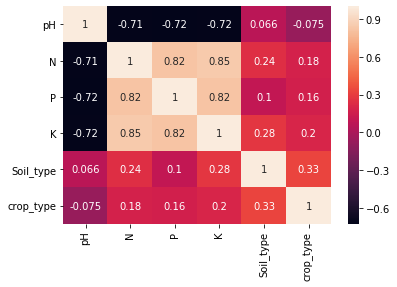

In [128]:
sns.heatmap(df.corr(),annot=True)

In [118]:
y = df['crop_type']

In [119]:
x = df.drop('crop_type',axis = 1)

In [120]:
x = x.drop('Soil_type',axis = 1)

In [121]:
x

,pH,N,P,K
0,7.03,118.72,25.00,185.82
1,2.57,131.09,24.62,181.71
2,3.39,104.32,18.37,202.39
3,2.73,111.21,21.09,202.71
4,1.52,90.90,23.76,195.39
...,...,...,...,...
994,7.72,62.75,4.72,136.45
995,7.55,70.29,1.18,159.48
996,7.60,68.53,10.19,152.47
997,7.77,71.67,6.65,135.13


In [81]:
y

0      0
1      0
2      0
3      0
4      0
      ..
994    9
995    9
996    9
997    9
998    9
Name: crop_type, Length: 999, dtype: int64

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression()

In [76]:
from sklearn.model_selection import train_test_split

In [122]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size = 0.25)

In [123]:
model.fit(Xtrain,Ytrain)

/home/nns/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
result = model.predict(Xtest)

In [109]:
from sklearn.metrics import r2_score,accuracy_score

In [125]:
r2_score(result,Ytest)

-1.7137095133941003

In [126]:
accuracy_score(result,Ytest)*100

38.800000000000004